In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

### Show all columns

In [2]:
pd.set_option('display.max_columns', None)

### Load the Data

In [3]:
df = pd.read_csv('./datasets/mushroom.csv')
df2 = pd.read_csv('./datasets/mushrooms.csv')

# rename columns
df2.rename(columns={'bruises':'ruises'}, inplace=True)

df = pd.concat([df, df2], axis=0)


### Show general information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34110 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     34110 non-null  object
 1   cap-shape                 30637 non-null  object
 2   cap-surface               30631 non-null  object
 3   cap-color                 30651 non-null  object
 4   ruises                    30638 non-null  object
 5   odor                      30660 non-null  object
 6   gill-attachment           30629 non-null  object
 7   gill-spacing              30711 non-null  object
 8   gill-size                 30618 non-null  object
 9   gill-color                30542 non-null  object
 10  stalk-shape               30636 non-null  object
 11  stalk-root                30582 non-null  object
 12  stalk-surface-above-ring  30602 non-null  object
 13  stalk-surface-below-ring  30687 non-null  object
 14  stalk-color-above-ring    30

### Show number of rows and columns

In [5]:
df.shape

(34110, 23)

### Show first 5 rows

In [15]:
df.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,t,NaN,s,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,e,b,f,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,t,r,s,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,t,b,s,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,e,?,s,k,NaN,w,p,w,NaN,l,w,v,d


### Show data types of features

In [16]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
ruises                      object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### All features are categorical

## Data Cleaning and Data Manipulation

### Checking for Missing Values

In [17]:
df.isna().sum()

class                          0
cap-shape                   3473
cap-surface                 3479
cap-color                   3459
ruises                      3472
odor                        3450
gill-attachment             3481
gill-spacing                3399
gill-size                   3492
gill-color                  3568
stalk-shape                 3474
stalk-root                  3528
stalk-surface-above-ring    3508
stalk-surface-below-ring    3423
stalk-color-above-ring      3573
stalk-color-below-ring      3433
veil-type                   3497
veil-color                  3503
ring-number                 3489
ring-type                   3508
spore-print-color           3493
population                  3511
habitat                     3484
dtype: int64

<Axes: >

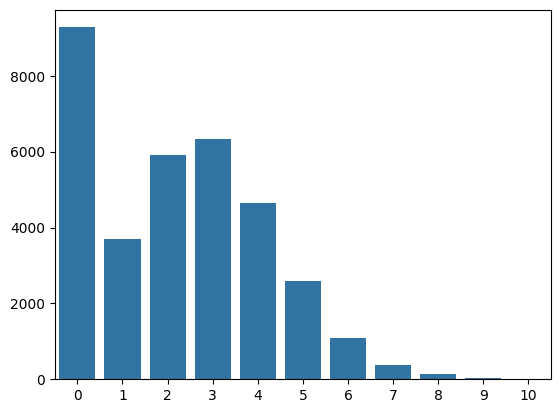

In [18]:
# print(data.describe())

# 统计所有行列中 NaN的个数的分布
distri = {}
for row in df.iterrows():
    cnt = 0
    for cell in row[1]:
        if str(cell) == 'nan':
            cnt += 1

    if cnt not in distri:
        distri[cnt] = 1
    distri[cnt] += 1


# 画图
sns.barplot(x=list(distri.keys()), y=list(distri.values()))

[0, 0.27200234535326884, 0.3804456171210789, 0.5538551744356494, 0.739871005570214, 0.8763412489006157, 0.9519495749047201, 0.984022280856054, 0.9953092934623279, 0.9992084432717679, 1.0000879507475815]


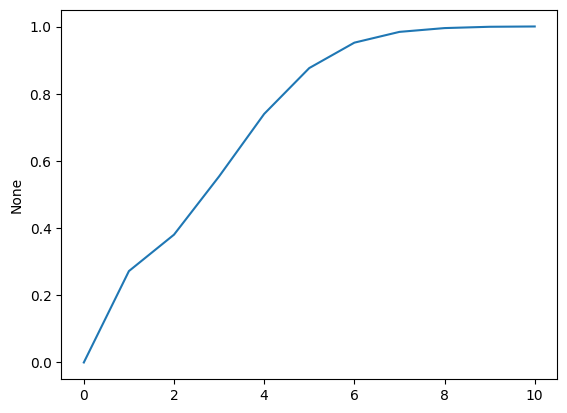

In [10]:
# 计算缺失值的比例
ratio = {}
for key in distri.keys():
    ratio[key] = distri[key] / df.shape[0]

sum_list = []
for i in range(0, len(ratio)):
    s = 0
    # 加上比i小的所有比例
    for j in range(0, i):
        if j in ratio.keys():
            s += ratio[j]
    sum_list.append(s)

# 画折线图
sns.lineplot(x=range(0, len(ratio) ), y=pd.Series(sum_list))
print(sum_list)


# find the last 97%
i = 0
while i < len(sum_list) and sum_list[i] < 0.97:
    i += 1

In [19]:
# # 丢弃缺失值个数超过i 的行
# for row in df.iterrows():
#     cnt = 0
#     for cell in row[1]:
#         if str(cell) == 'nan':
#             cnt += 1
#     if cnt > i:
#         df.drop(row[0], inplace=True)

### Total of Missing Values

In [20]:
df.isna().sum().sum()

76697

### Checking for Duplicates

In [21]:
df.duplicated().sum()

0

## Visualizing of Categorical Features

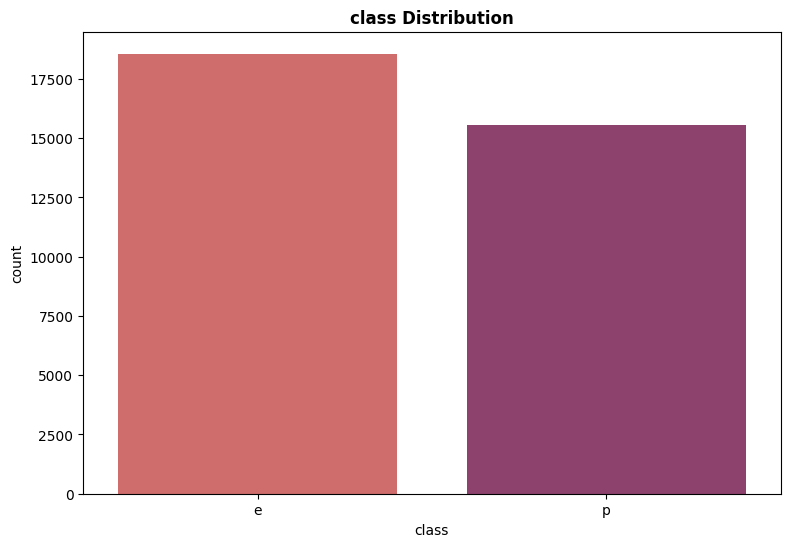

ValueError: cannot reindex on an axis with duplicate labels

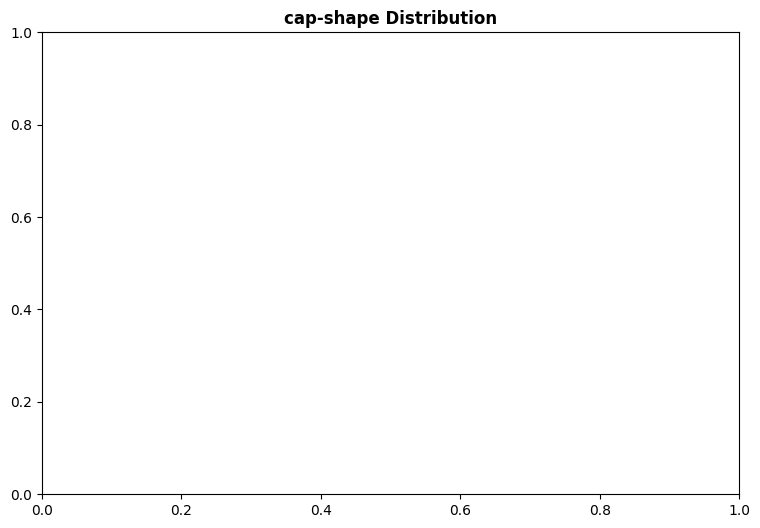

In [14]:
for i in df.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + ' Distribution', weight = 'bold')
    sns.countplot(x = df[i], palette = 'flare')
    plt.show()
    print()

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'ruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Show value counts information of Categorical Features

In [ ]:
data_categorical_list = [df['class'], df['cap-shape'], df['cap-surface'], df['cap-color'], df['ruises'],
                         df['odor'], df['gill-attachment'], df['gill-spacing'], df['gill-size'], df['gill-color'],
                         df['stalk-shape'], df['stalk-root'], df['stalk-surface-above-ring'],
                         df['stalk-surface-below-ring'], df['stalk-color-above-ring'], df['stalk-color-below-ring'],
                         df['veil-type'], df['veil-color'], df['ring-number'], df['ring-type'],
                         df['spore-print-color'], df['population'], df['habitat']]

for i in data_categorical_list:
    print('value counts: ')
    print(i.value_counts())
    print()
    print('by percentage: ')
    print(i.value_counts(normalize = True).round(2))
    print('-------------------------')

value counts: 
class
e    14354
p    11632
Name: count, dtype: int64

by percentage: 
class
e    0.55
p    0.45
Name: proportion, dtype: float64
-------------------------
value counts: 
cap-shape
x    7674
f    6722
k    2912
b    2260
c    1477
s    1468
Name: count, dtype: int64

by percentage: 
cap-shape
x    0.34
f    0.30
k    0.13
b    0.10
c    0.07
s    0.07
Name: proportion, dtype: float64
-------------------------
value counts: 
cap-surface
y    7602
s    6520
f    6224
g    2161
Name: count, dtype: int64

by percentage: 
cap-surface
y    0.34
s    0.29
f    0.28
g    0.10
Name: proportion, dtype: float64
-------------------------
value counts: 
cap-color
n    4810
g    3991
e    3461
y    2670
w    2589
b    1211
p    1094
c     939
u     915
r     847
Name: count, dtype: int64

by percentage: 
cap-color
n    0.21
g    0.18
e    0.15
y    0.12
w    0.11
b    0.05
p    0.05
c    0.04
u    0.04
r    0.04
Name: proportion, dtype: float64
-------------------------
value counts: 

### Drop column 'veil-type' (because same value for all of mushrooms)

In [ ]:
# df.drop(columns = ['veil-type'], inplace = True)

## Encoding of Categorical Data

In [ ]:
# mask = df.isnull()
# df = df.astype(str).apply(LabelEncoder().fit_transform)
# df.where(~mask, np.nan, inplace = True)

# # KNN Imputer
# from sklearn.impute import KNNImputer

# df = pd.DataFrame(KNNImputer(n_neighbors = 63).fit_transform(df), columns = df.columns)

# df.head()

In [ ]:
# 用众数填充缺失值
df = df.apply(lambda x: x.fillna(df.mode().iloc[0]))
df = df.astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
# # KNN Imputer
# from sklearn.impute import KNNImputer
# from tqdm.contrib.concurrent import process_map


# def test(n):
#     imputer = KNNImputer(n_neighbors=n)
#     df_imputed = imputer.fit_transform(df)
#     df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

#     # Splitting the data
#     X = df_imputed.drop(columns='class')
#     y = df_imputed['class']

#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42)

#     # SVM
#     model = SVC()
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     return accuracy_score(y_test, y_pred)


# rng = range(1, 100)

# score = process_map(test, rng, max_workers=8)

# # Plotting the scores
# sns.lineplot(x=rng, y=score)

## Dealing with Outliers

In [ ]:
# import tqdm
# from tqdm.contrib.concurrent import process_map

# for feature in df.columns:
#     Q1 = df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)
#     IQR = Q3 - Q1

# def outlier_treatment(colume_name) -> None:
#     global df
#     Q1, Q3 = df[colume_name].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
    
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     outliers_iqr = df[(df[colume_name] < lower_bound) | (df[colume_name] > upper_bound)]
    
#     if outliers_iqr.empty:
#         tqdm.tqdm.write(f'No outliers found in {colume_name}')
#     else:
#         # drop
#         tqdm.tqdm.write(f'Outliers found in {colume_name}, dropping {outliers_iqr.shape[0]} rows')
#         df.drop(outliers_iqr.index, inplace=True)
#         df = df.reset_index(drop = True)

# for feature in df.columns:
#     outlier_treatment(feature)

# # ret = process_map(outlier_treatment, df.columns)

In [ ]:
df.shape

(25986, 23)

In [ ]:
x = df.drop(columns = ['class']) # inputs

y = df['class']                  # target

In [ ]:
x.shape, y.shape

((25986, 22), (25986,))

### Splitting Data into Training and Testing Sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape, y_train.shape

((20788, 22), (20788,))

In [ ]:
x_test.shape, y_test.shape

((5198, 22), (5198,))

## Logistic Regression

In [ ]:
logistic_reg = LogisticRegression(solver = 'liblinear')

logistic_reg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

### Predictions based on test data

In [ ]:
logistic_reg_predictions = logistic_reg.predict(x_test)

print('poisonous', sum(logistic_reg_predictions == 0))
print('edible', sum(logistic_reg_predictions == 1))

poisonous 3494
edible 1704


### Confusion Matrix

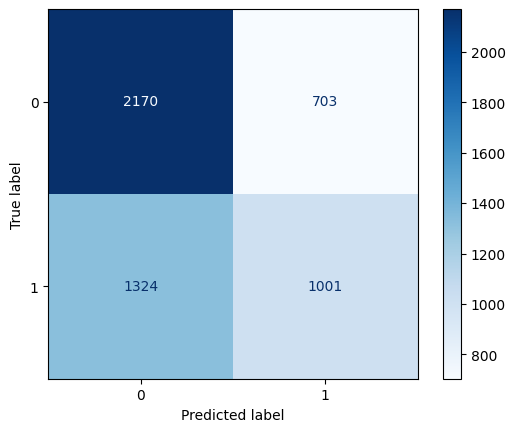

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, logistic_reg_predictions,
                                        labels = logistic_reg.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, logistic_reg_predictions))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      2873
           1       0.59      0.43      0.50      2325

    accuracy                           0.61      5198
   macro avg       0.60      0.59      0.59      5198
weighted avg       0.61      0.61      0.60      5198



## Accuracy of Model: 1 = 100%

## Decision Tree Classifier

In [ ]:
decision_tree_clf = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'gini', random_state = 42)

decision_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

### Predictions based on test data

In [ ]:
decision_tree_predictions = decision_tree_clf.predict(x_test)

print('poisonous', sum(decision_tree_predictions == 0))
print('edible', sum(decision_tree_predictions == 1))

poisonous 3069
edible 2129


### Confusion Matrix

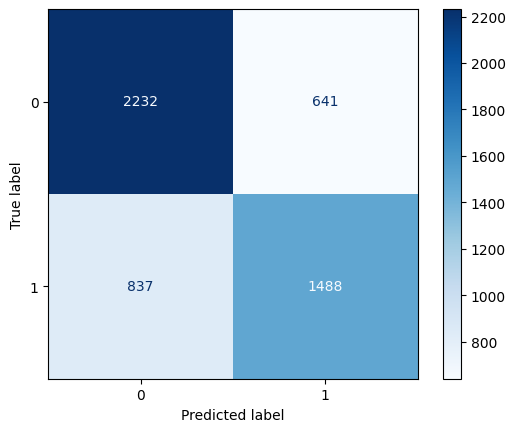

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, decision_tree_predictions,
                                        labels = decision_tree_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, decision_tree_predictions))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      2873
           1       0.70      0.64      0.67      2325

    accuracy                           0.72      5198
   macro avg       0.71      0.71      0.71      5198
weighted avg       0.71      0.72      0.71      5198



## Accuracy of Model: 1 = 100%

### Feature Engineering

In [ ]:
decision_tree_feature_importances = pd.DataFrame({'Feature': decision_tree_clf.feature_names_in_ ,
                                                  'Importance': decision_tree_clf.feature_importances_})

decision_tree_feature_importances['Importance'] = decision_tree_feature_importances['Importance'].round(4)

decision_tree_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,odor,0.9196
1,gill-size,0.0382
2,gill-color,0.0132
3,spore-print-color,0.0131
4,stalk-surface-above-ring,0.0084
5,ruises,0.0076
6,stalk-color-above-ring,0.0000
7,population,0.0000
8,ring-type,0.0000
9,ring-number,0.0000


### Visualizing of Feature Importances

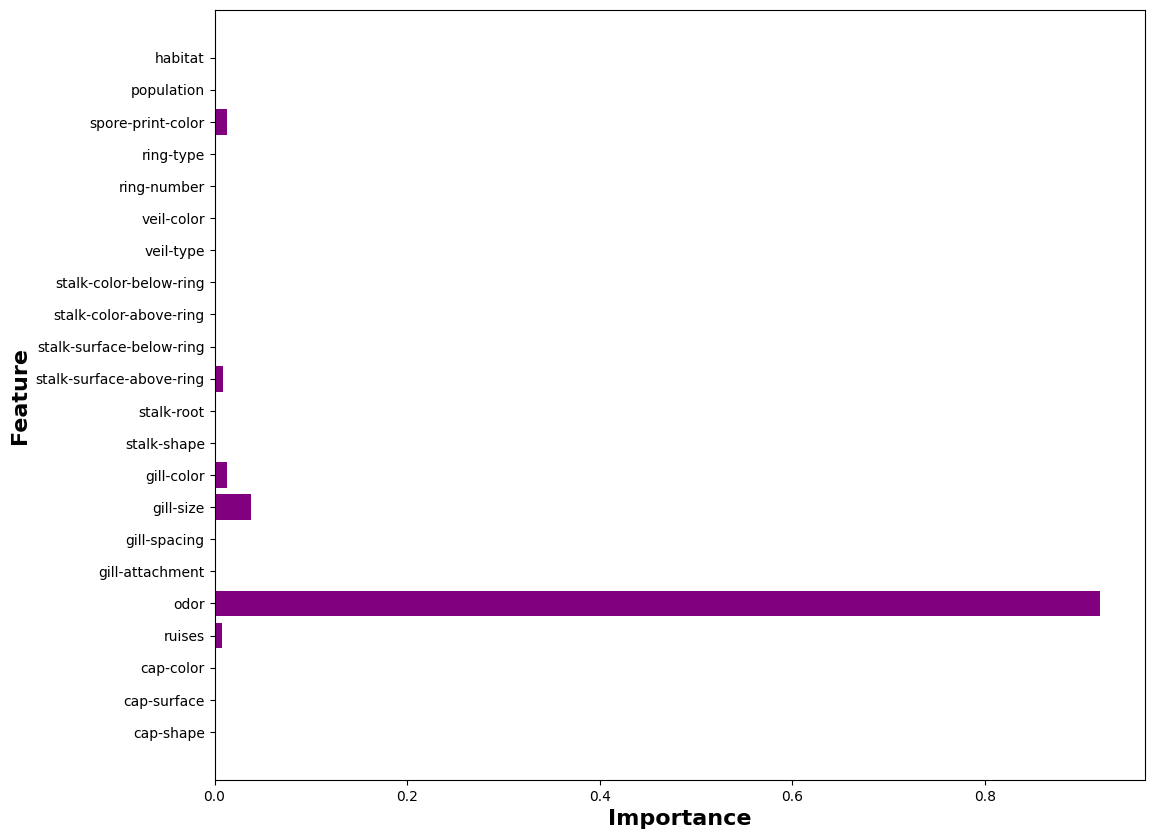

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(decision_tree_feature_importances['Feature'], 
         decision_tree_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance = 0.0

In [ ]:
decision_tree_feature_importances[decision_tree_feature_importances['Importance'] == 0.0].reset_index(drop = True)

,Feature,Importance
0,cap-shape,0.0
1,cap-surface,0.0
2,cap-color,0.0
3,gill-attachment,0.0
4,gill-spacing,0.0
5,stalk-shape,0.0
6,stalk-root,0.0
7,stalk-surface-below-ring,0.0
8,stalk-color-above-ring,0.0
9,stalk-color-below-ring,0.0


### number of these features:

In [ ]:
len(decision_tree_feature_importances[decision_tree_feature_importances['Importance'] == 0.0].reset_index(drop = True))

16

### These 18 features have not contributed to model

## Random Forest Classifier

In [ ]:
random_forest_clf = RandomForestClassifier(ccp_alpha = 0.0001, criterion = 'entropy', random_state = 42)

random_forest_clf.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.0001, criterion='entropy', random_state=42)

### Predictions based on test data

In [ ]:
random_forest_predictions = random_forest_clf.predict(x_test)

print('poisonous', sum(random_forest_predictions == 0))
print('edible', sum(random_forest_predictions == 1))

poisonous 3161
edible 2037


### Confusion Matrix

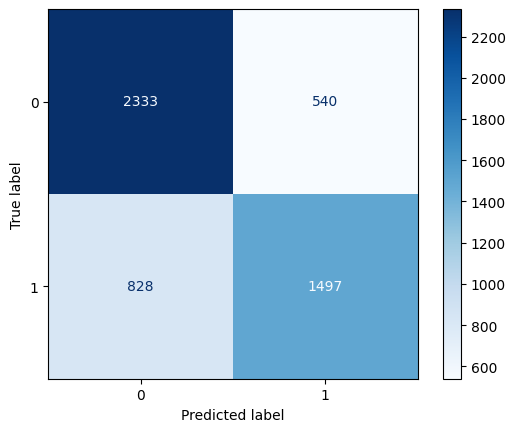

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, random_forest_predictions,
                                        labels = random_forest_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, random_forest_predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      2873
           1       0.73      0.64      0.69      2325

    accuracy                           0.74      5198
   macro avg       0.74      0.73      0.73      5198
weighted avg       0.74      0.74      0.73      5198



## Accuracy of Model: 1 = 100%

### Feature Engineering

In [ ]:
random_forest_feature_importances = pd.DataFrame({'Feature': random_forest_clf.feature_names_in_ ,
                                                  'Importance': random_forest_clf.feature_importances_})

random_forest_feature_importances['Importance'] = random_forest_feature_importances['Importance'].round(4)

random_forest_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,odor,0.2033
1,gill-color,0.0625
2,cap-color,0.0564
3,spore-print-color,0.0552
4,stalk-color-below-ring,0.0510
5,stalk-color-above-ring,0.0509
6,habitat,0.0487
7,population,0.0460
8,cap-shape,0.0444
9,stalk-root,0.0428


### Visualizing of Feature Importances

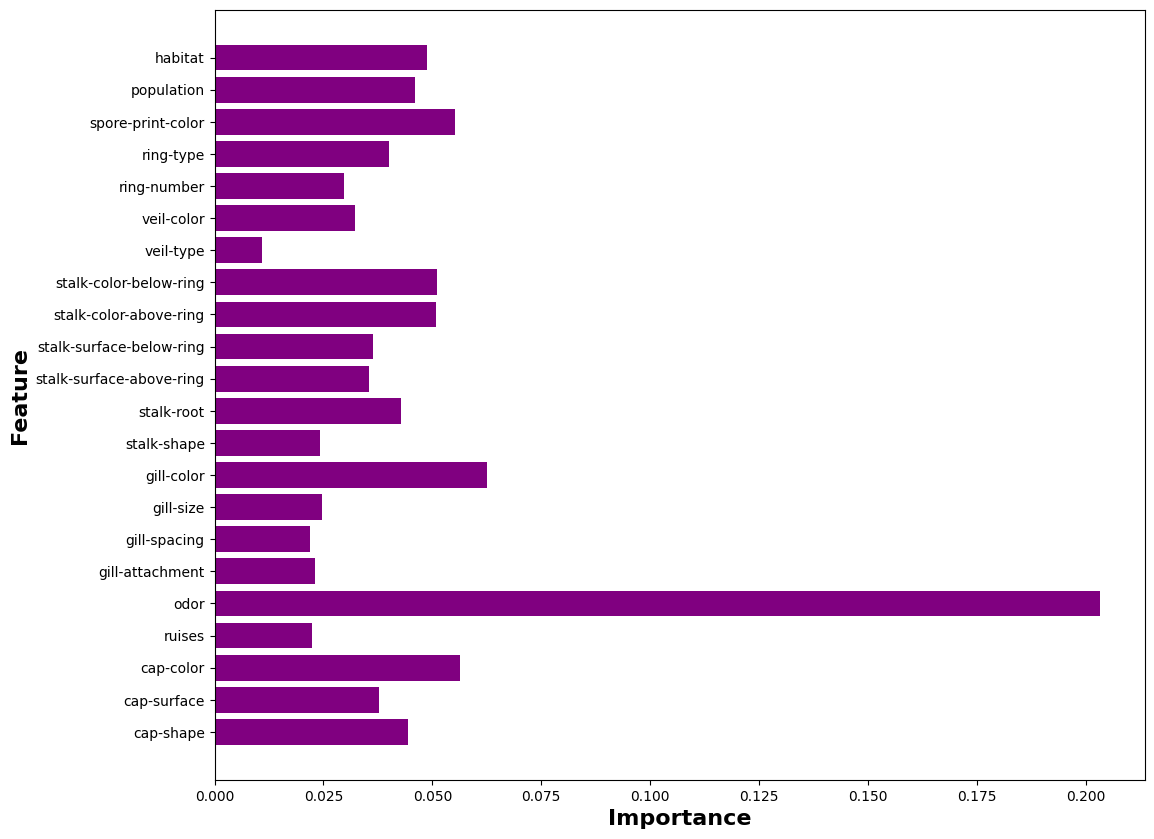

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(random_forest_feature_importances['Feature'], 
         random_forest_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance = 0.0

In [ ]:
random_forest_feature_importances[random_forest_feature_importances['Importance'] == 0.0].reset_index(drop = True)

,Feature,Importance


## K-Nearest Neighbors (KNN) Classifier

### Getting the Error Rates of a Set of Models

In [ ]:
from tqdm.contrib.concurrent import process_map

error_uniform = []  # error rates from models with uniformly distributed weights
error_distance = []  # error rates from models with distance based weights

k_range = list(range(1, 100, 2))


def proc(k):
    knn_clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_clf.fit(x_train, y_train)
    predictions = knn_clf.predict(x_test)
    uniform = accuracy_score(y_test, predictions)

    knn_clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_clf.fit(x_train, y_train)
    predictions = knn_clf.predict(x_test)
    distance = accuracy_score(y_test, predictions)
    return uniform, distance


score = process_map(proc, k_range, max_workers=16)
uniform, distance = zip(*score)

  0%|          | 0/50 [00:00<?, ?it/s]

[]

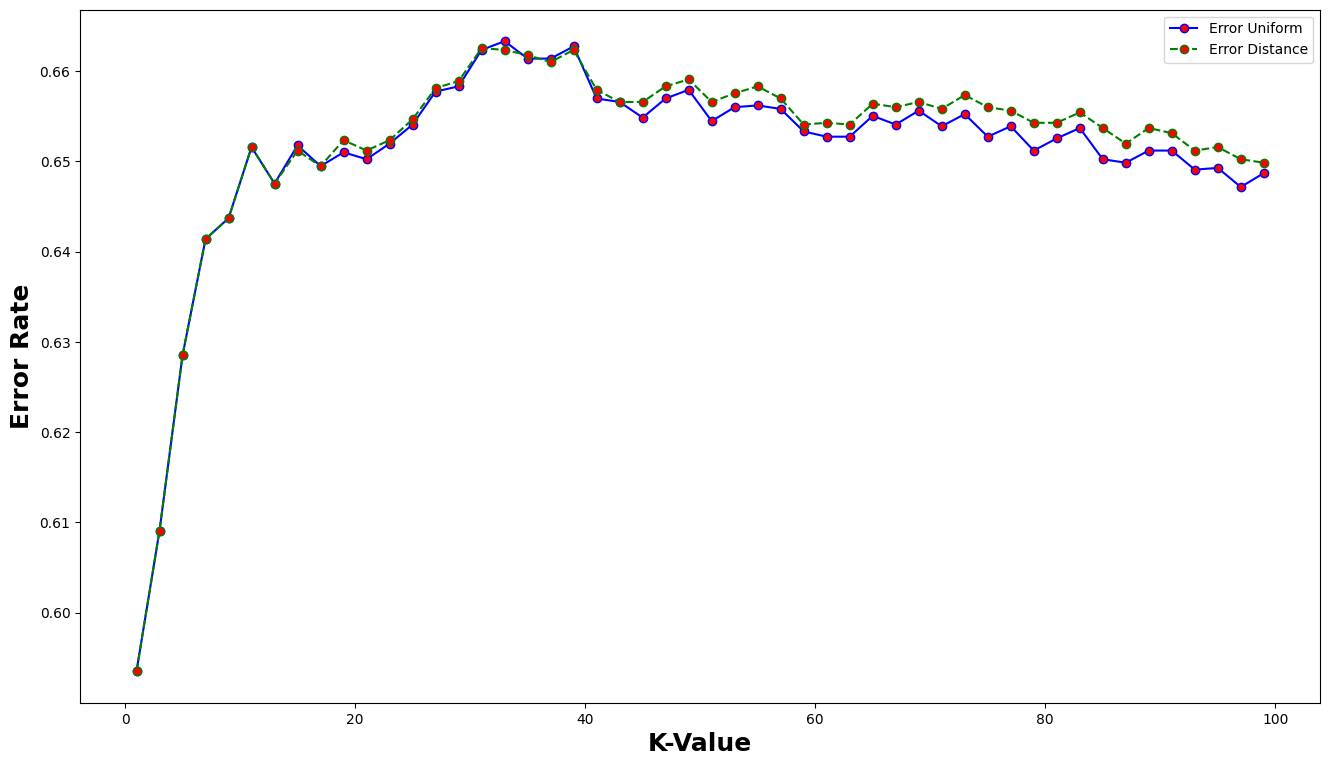

In [ ]:
plt.figure(figsize = (16,9))

plt.plot(k_range, uniform, c = 'blue', linestyle = 'solid',
         marker = 'o', markerfacecolor = 'red', label = 'Error Uniform')

plt.plot(k_range, distance, c = 'green', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', label = 'Error Distance')

plt.legend()

plt.xlabel('K-Value', fontsize = 18, weight = 'bold')
plt.ylabel('Error Rate', fontsize = 18, weight = 'bold')

plt.plot()

In [ ]:
max_uniform = k_range[uniform.index(max(uniform))]
max_distance = k_range[uniform.index(max(uniform))]

n_neighbors = max(max_uniform, max_distance)
weights = 'uniform' if max_uniform > max_distance else 'distance'

### Predictions based on test data

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=33, weights='distance')

In [ ]:
knn_predictions = knn_clf.predict(x_test)

print('poisonous', sum(knn_predictions == 0))
print('edible', sum(knn_predictions == 1))

poisonous 3396
edible 1802


### Confusion Matrix

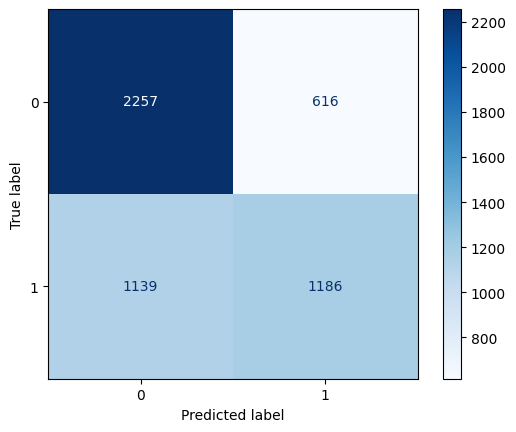

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions,
                                        labels = knn_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      2873
           1       0.66      0.51      0.57      2325

    accuracy                           0.66      5198
   macro avg       0.66      0.65      0.65      5198
weighted avg       0.66      0.66      0.66      5198



## Accuracy of Model: 1 = 100%

## Support Vector Machines (SVM) Classifier

### 1- Linear Kernel

In [ ]:
linear_svm_clf = SVC(kernel = 'linear')

linear_svm_clf.fit(x_train, y_train)

SVC(kernel='linear')

### Predictions based on test data

In [ ]:
linear_svm_predictions = linear_svm_clf.predict(x_test)

print('poisonous', sum(linear_svm_predictions == 0))
print('edible', sum(linear_svm_predictions == 1))

poisonous 3555
edible 1643


### Confusion Matrix

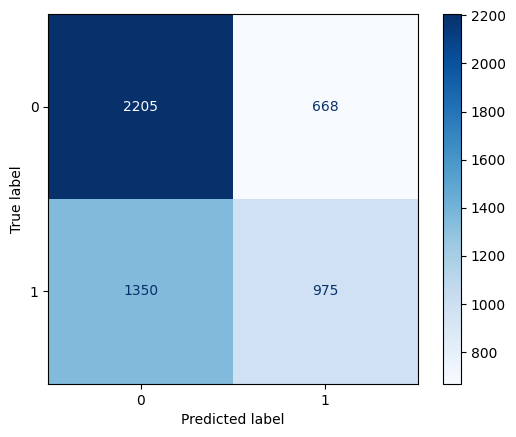

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, linear_svm_predictions,
                                        labels = linear_svm_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, linear_svm_predictions))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69      2873
           1       0.59      0.42      0.49      2325

    accuracy                           0.61      5198
   macro avg       0.61      0.59      0.59      5198
weighted avg       0.61      0.61      0.60      5198



## Accuracy of Model: 1 = 100%

### 2- Polynomial Kernel

In [ ]:
poly_svm_clf = SVC(kernel = 'poly')

poly_svm_clf.fit(x_train, y_train)

SVC(kernel='poly')

### Predictions based on test data

In [ ]:
poly_svm_predictions = poly_svm_clf.predict(x_test)

print('poisonous', sum(poly_svm_predictions == 0))
print('edible', sum(poly_svm_predictions == 1))

poisonous 3418
edible 1780


### Confusion Matrix

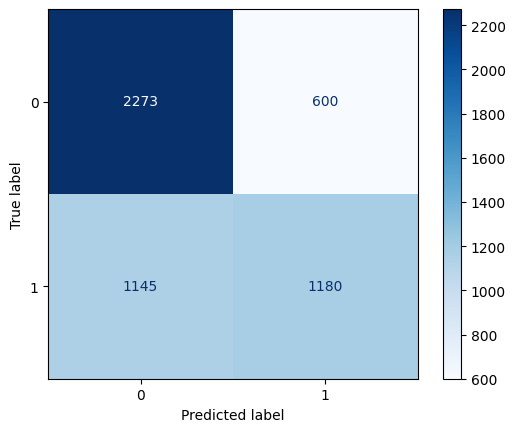

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, poly_svm_predictions,
                                        labels = poly_svm_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, poly_svm_predictions))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72      2873
           1       0.66      0.51      0.57      2325

    accuracy                           0.66      5198
   macro avg       0.66      0.65      0.65      5198
weighted avg       0.66      0.66      0.66      5198



## Accuracy of Model: 1 = 100%

### 3- Sigmoid Kernel

In [ ]:
sigmoid_svm_clf = SVC(kernel='sigmoid')

sigmoid_svm_clf.fit(x_train, y_train)

SVC(kernel='sigmoid')

### Predictions based on test data

In [ ]:
sigmoid_svm_predictions = sigmoid_svm_clf.predict(x_test)

print('poisonous', sum(sigmoid_svm_predictions == 0))
print('edible', sum(sigmoid_svm_predictions == 1))

poisonous 2837
edible 2361


### Confusion Matrix

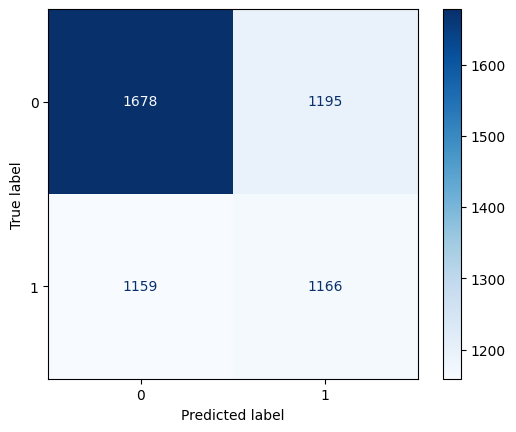

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, sigmoid_svm_predictions,
                                        labels = sigmoid_svm_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, sigmoid_svm_predictions))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59      2873
           1       0.49      0.50      0.50      2325

    accuracy                           0.55      5198
   macro avg       0.54      0.54      0.54      5198
weighted avg       0.55      0.55      0.55      5198



## Accuracy of Model: 0.48 = 48%

### very bad results!!!

### Model fails to predict target

### 4- Radial Kernel

In [ ]:
rbf_svm_clf = SVC(kernel = 'rbf') # rbf: radial basis function

rbf_svm_clf.fit(x_train, y_train)

SVC()

### Predictions based on test data

In [ ]:
rbf_svm_predictions = rbf_svm_clf.predict(x_test)

print('poisonous', sum(rbf_svm_predictions == 0))
print('edible', sum(rbf_svm_predictions == 1))

poisonous 3317
edible 1881


### Confusion Matrix

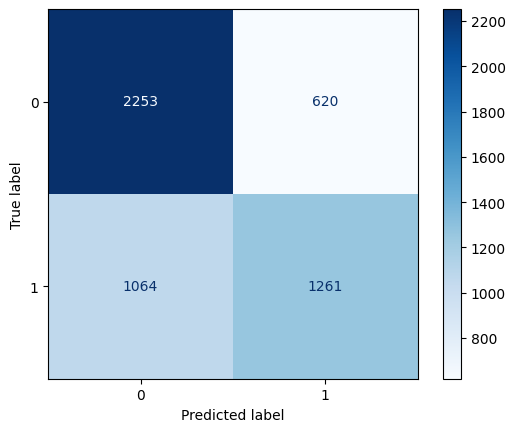

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, rbf_svm_predictions,
                                        labels = rbf_svm_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, rbf_svm_predictions))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      2873
           1       0.67      0.54      0.60      2325

    accuracy                           0.68      5198
   macro avg       0.67      0.66      0.66      5198
weighted avg       0.68      0.68      0.67      5198



## Accuracy of Model: 1 = 100%

## Gradient Boosting Classifier

In [ ]:
GB_clf = GradientBoostingClassifier(learning_rate = 1, ccp_alpha = 0.0001, random_state = 42, max_depth = 3)

GB_clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0001, learning_rate=1, random_state=42)

### Predictions based on test data

In [ ]:
GBC_predictions = GB_clf.predict(x_test)

print('poisonous', sum(GBC_predictions == 0))
print('edible', sum(GBC_predictions == 1))

poisonous 2975
edible 2223


### Confusion Matrix

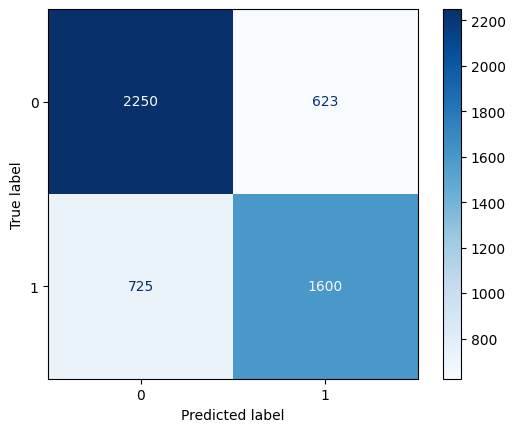

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, GBC_predictions,
                                        labels = GB_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, GBC_predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2873
           1       0.72      0.69      0.70      2325

    accuracy                           0.74      5198
   macro avg       0.74      0.74      0.74      5198
weighted avg       0.74      0.74      0.74      5198



## Accuracy of Model: 1 = 100%

### Feature Engineering

In [ ]:
GBC_feature_importances = pd.DataFrame({'Feature': GB_clf.feature_names_in_ ,
                                        'Importance': GB_clf.feature_importances_})

GBC_feature_importances['Importance'] = GBC_feature_importances['Importance'].round(4)

GBC_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,odor,0.8003
1,gill-size,0.0526
2,stalk-surface-above-ring,0.0382
3,spore-print-color,0.0285
4,ring-type,0.0181
5,gill-color,0.0169
6,ruises,0.0157
7,stalk-surface-below-ring,0.0137
8,population,0.0069
9,gill-spacing,0.0063


### Visualizing of Feature Importances

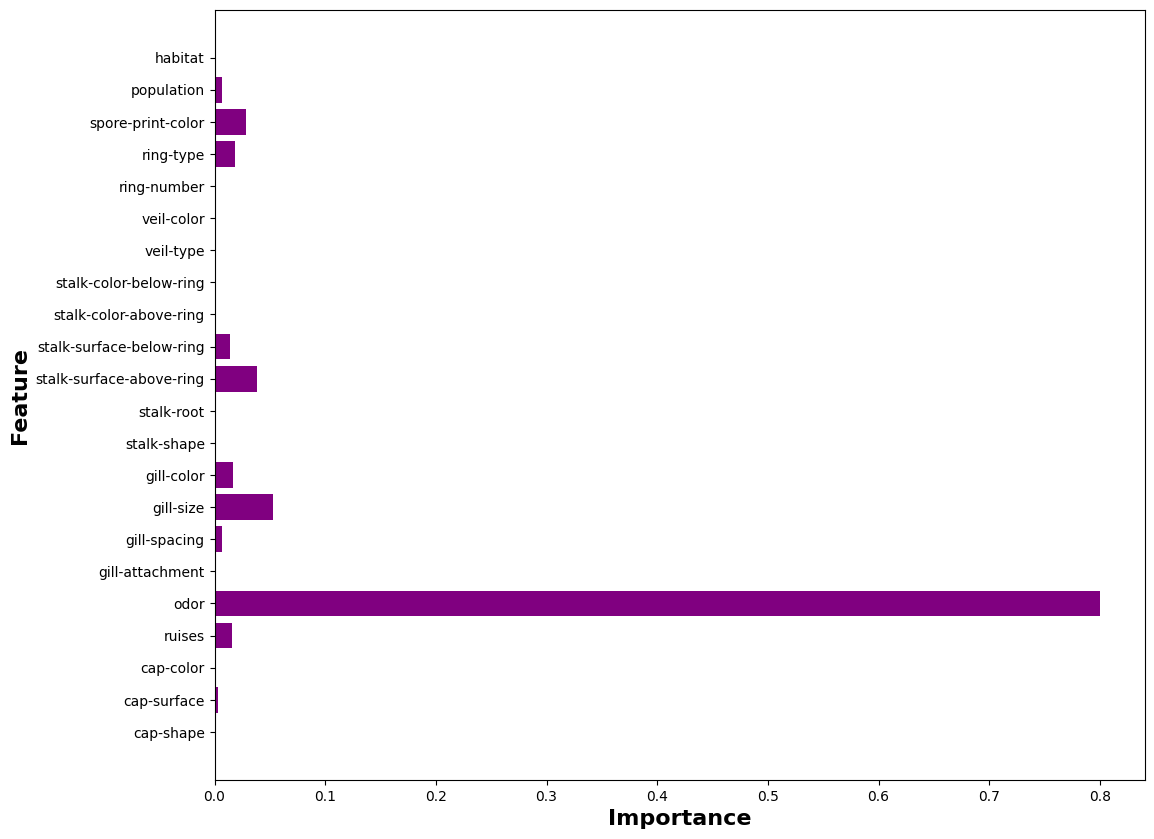

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(GBC_feature_importances['Feature'], 
         GBC_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [ ]:
GBC_feature_importances[GBC_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,cap-shape,0.0000
1,cap-surface,0.0029
2,cap-color,0.0000
3,gill-attachment,0.0000
4,gill-spacing,0.0063
5,stalk-shape,0.0000
6,stalk-root,0.0000
7,stalk-color-above-ring,0.0000
8,stalk-color-below-ring,0.0000
9,veil-type,0.0000


### number of these features:

In [ ]:
len(GBC_feature_importances[GBC_feature_importances['Importance'] < 0.01].reset_index(drop = True))

14

### These 18 features have not contributed to model

## Ada Boost Classifier

In [ ]:
AB_clf = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators = 150, random_state = 42)

AB_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=150,
                   random_state=42)

### Predictions based on test data

In [ ]:
AB_predictions = AB_clf.predict(x_test)

print('poisonous', sum(AB_predictions == 0))
print('edible', sum(AB_predictions == 1))

poisonous 2920
edible 2278


### Confusion Matrix

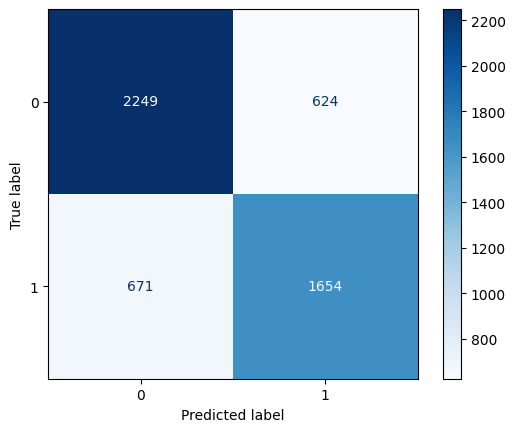

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, AB_predictions,
                                        labels = AB_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, AB_predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2873
           1       0.73      0.71      0.72      2325

    accuracy                           0.75      5198
   macro avg       0.75      0.75      0.75      5198
weighted avg       0.75      0.75      0.75      5198



## Accuracy of Model: 1 = 100%

### Feature Engineering

In [ ]:
AdaBoost_feature_importances = pd.DataFrame({'Feature': AB_clf.feature_names_in_ ,
                                            'Importance': AB_clf.feature_importances_})

AdaBoost_feature_importances['Importance'] = AdaBoost_feature_importances['Importance'].round(4)

AdaBoost_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,odor,0.4440
1,spore-print-color,0.0993
2,stalk-surface-above-ring,0.0803
3,stalk-surface-below-ring,0.0591
4,gill-size,0.0584
5,gill-color,0.0564
6,population,0.0346
7,ruises,0.0295
8,ring-type,0.0295
9,cap-surface,0.0180


### Visualizing of Feature Importances

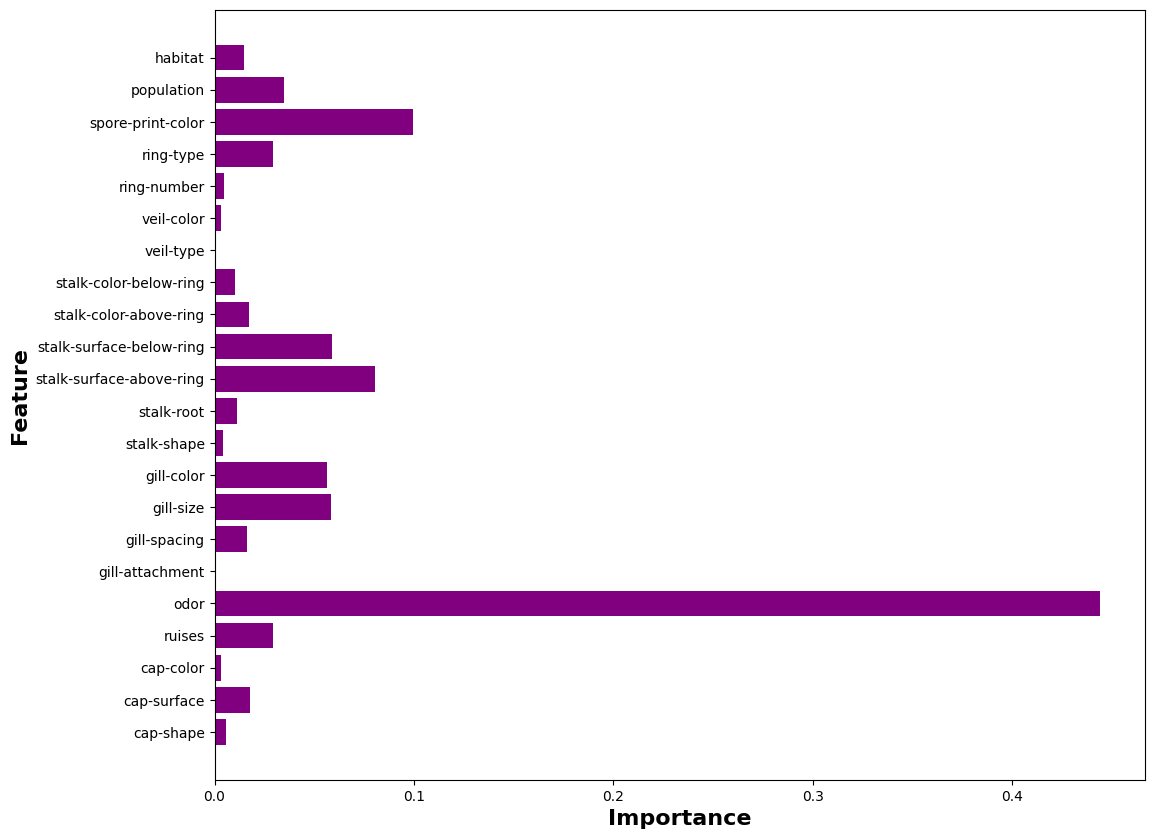

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(AdaBoost_feature_importances['Feature'], 
         AdaBoost_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance = 0.0

In [ ]:
AdaBoost_feature_importances[AdaBoost_feature_importances['Importance'] == 0.0].reset_index(drop = True)

,Feature,Importance
0,gill-attachment,0.0
1,veil-type,0.0


### number of these features:

In [ ]:
len(AdaBoost_feature_importances[AdaBoost_feature_importances['Importance'] == 0.0].reset_index(drop = True))

2

### These 14 features have not contributed to model

## Bagging Classifier

In [ ]:
bagging_clf = BaggingClassifier(n_estimators = 10)

bagging_clf.fit(x_train, y_train)

BaggingClassifier()

### Predictions based on test data

In [ ]:
bagging_predictions = bagging_clf.predict(x_test)

print('poisonous', sum(bagging_predictions == 0))
print('edible', sum(bagging_predictions == 1))

poisonous 3212
edible 1986


### Confusion Matrix

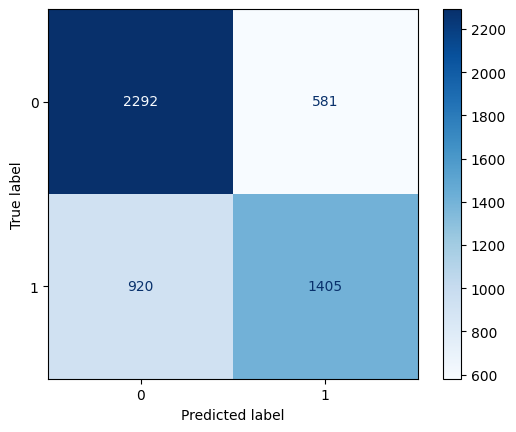

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, bagging_predictions,
                                        labels = bagging_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, bagging_predictions))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      2873
           1       0.71      0.60      0.65      2325

    accuracy                           0.71      5198
   macro avg       0.71      0.70      0.70      5198
weighted avg       0.71      0.71      0.71      5198



## Accuracy of Model: 1 = 100%

## XGBoost Classifier

In [ ]:
XGBoost_clf = xgb.XGBClassifier(objective = 'binary:logistic', learning_rate = 1, random_state = 42)

XGBoost_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Predictions based on test data

In [ ]:
XGB_predictions = XGBoost_clf.predict(x_test)

print('poisonous', sum(XGB_predictions == 0))
print('edible', sum(XGB_predictions == 1))

poisonous 2929
edible 2269


### Confusion Matrix

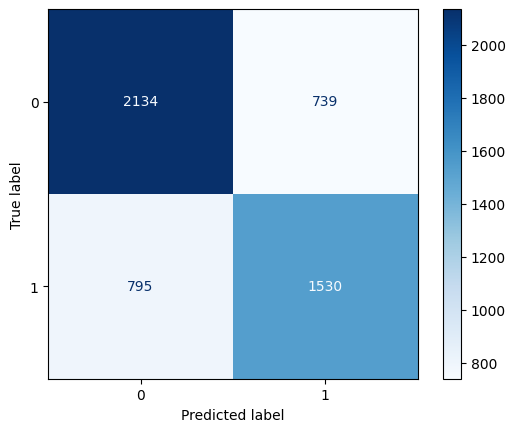

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, XGB_predictions,
                                        labels = XGBoost_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, XGB_predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      2873
           1       0.67      0.66      0.67      2325

    accuracy                           0.70      5198
   macro avg       0.70      0.70      0.70      5198
weighted avg       0.70      0.70      0.70      5198



## Accuracy of Model: 1 = 100%

### Feature Engineering

In [ ]:
XGBoost_feature_importances = pd.DataFrame({'Feature': XGBoost_clf.feature_names_in_ ,
                                            'Importance': XGBoost_clf.feature_importances_})

XGBoost_feature_importances['Importance'] = XGBoost_feature_importances['Importance'].round(4)

XGBoost_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,odor,0.2205
1,gill-size,0.0674
2,ruises,0.0453
3,stalk-surface-above-ring,0.0440
4,spore-print-color,0.0412
5,ring-type,0.0385
6,gill-color,0.0377
7,stalk-surface-below-ring,0.0371
8,population,0.0356
9,stalk-root,0.0356


### Visualizing of Feature Importances

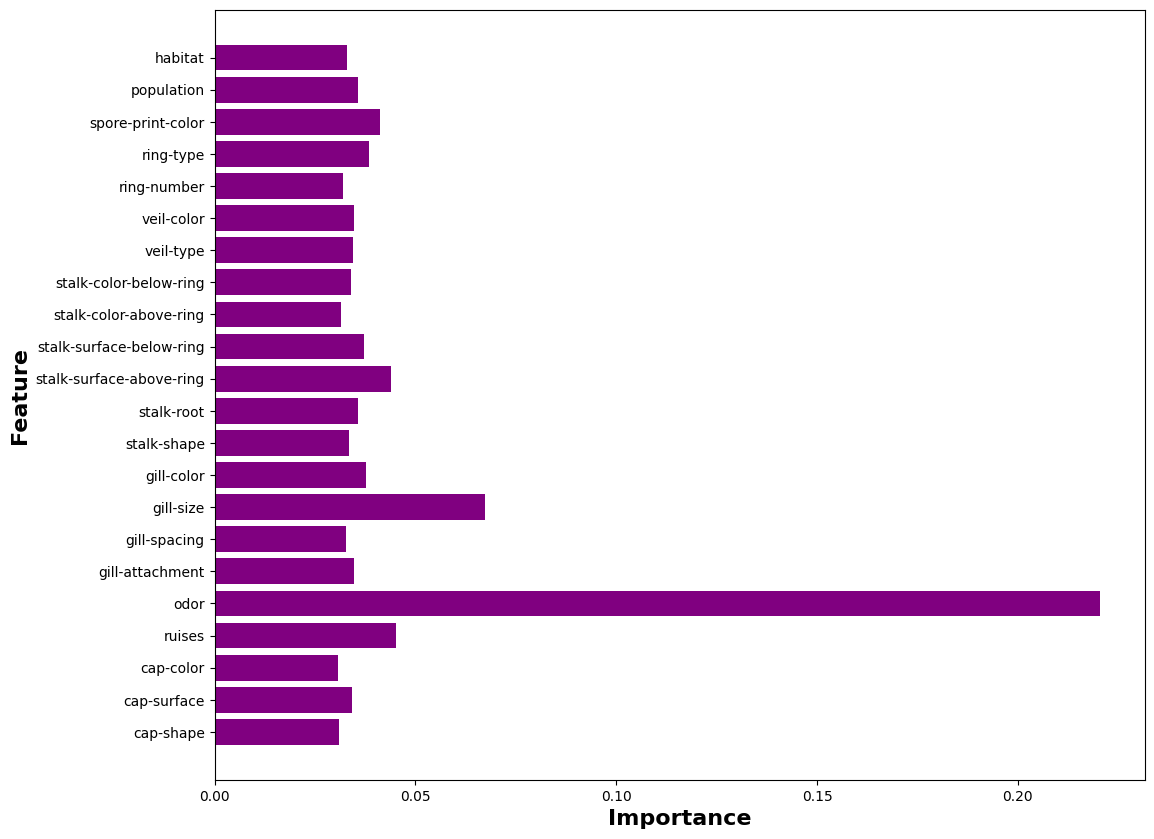

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(XGBoost_feature_importances['Feature'], 
         XGBoost_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [ ]:
XGBoost_feature_importances[XGBoost_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance


### number of these features:

In [ ]:
len(XGBoost_feature_importances[XGBoost_feature_importances['Importance'] < 0.01].reset_index(drop = True))

0

### These 18 features have not contributed to model

## Comparison of Models

In [ ]:
Model_Comparison_Table = pd.DataFrame(data = [accuracy_score(y_test, logistic_reg_predictions), 
                                              accuracy_score(y_test, decision_tree_predictions),
                                              accuracy_score(y_test, random_forest_predictions),
                                              accuracy_score(y_test, knn_predictions),
                                              accuracy_score(y_test, linear_svm_predictions),
                                              accuracy_score(y_test, poly_svm_predictions),
                                              accuracy_score(y_test, sigmoid_svm_predictions),
                                              accuracy_score(y_test, rbf_svm_predictions),
                                              accuracy_score(y_test, GBC_predictions),
                                              accuracy_score(y_test, AB_predictions),
                                              accuracy_score(y_test, bagging_predictions),
                                              accuracy_score(y_test, XGB_predictions)],
                                      index = ['Logistic Regression','Decision Tree','Random Forest','KNN',
                                               'Linear SVM','Polynomial SVM','Sigmoid SVM','Radial SVM',
                                               'Gradient Boosting','Ada Boost','Bagging','XGBoost'],
                                      columns = ['Accuracy'])

In [ ]:
Model_Comparison_Table['Accuracy'] = Model_Comparison_Table['Accuracy']

Model_Comparison_Table.sort_values(by = ['Accuracy'], ascending = False)

,Accuracy
Ada Boost,0.750866
Gradient Boosting,0.740669
Random Forest,0.736822
Decision Tree,0.715660
Bagging,0.711235
XGBoost,0.704886
Radial SVM,0.676029
Polynomial SVM,0.664294
KNN,0.662370
Linear SVM,0.611774


# All models are perfect except Sigmoid SVM